# Assignment 8 - Principal Component Analysis

Xiuyuan Zhang

In [97]:
# import relevant Python packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import scipy.cluster.hierarchy as cluster_hierarchy
import scipy.spatial.distance as spatial_distance
from scipy.cluster.hierarchy import linkage, dendrogram

%matplotlib inline

## Part I
### 1. Perform PCA analysis on the college dataset and plot the first two principal components. Describe the results.

In [98]:
# load files and replace the binary "Yes or No" variable with (1, 0)
df = pd.read_csv("College.csv")
df.Private.replace(("Yes", "No"), (1,0), inplace = True)

In [99]:
# use PCA and generate a new DataFrame
pca_all = PCA().fit(df)
col_names = ["PC - " + str(i) for i in range(1, len(df.columns) + 1)]
X_pca = pd.DataFrame(pca_all.components_.T, index = df.columns, columns = col_names)
# show
X_pca

,PC - 1,PC - 2,PC - 3,PC - 4,PC - 5,PC - 6,PC - 7,PC - 8,PC - 9,PC - 10,PC - 11,PC - 12,PC - 13,PC - 14,PC - 15,PC - 16,PC - 17,PC - 18
Private,-0.000031,0.000040,-0.000043,0.000006,-0.000010,-0.000014,-7.583752e-07,-0.000035,-0.000041,0.000077,0.001742,0.006304,0.000098,0.002670,-0.000892,-0.001771,-0.014607,9.998664e-01
Apps,0.557026,-0.039361,-0.167353,0.664271,0.164687,0.058050,1.343426e-01,0.411794,-0.027407,-0.003760,0.004389,-0.003022,-0.000531,0.000401,0.000589,0.001128,-0.000187,3.369198e-05
Accept,0.347712,-0.077162,-0.162363,0.232927,0.005806,0.060281,-2.399573e-01,-0.841807,0.149990,0.005824,-0.008233,0.005367,0.001760,0.001075,-0.001251,-0.002473,0.000233,-4.257937e-05
Enroll,0.129854,-0.045413,-0.009663,-0.058832,-0.064077,0.021307,-4.089118e-02,-0.118368,-0.978310,-0.007720,0.007086,-0.006926,0.001317,-0.003497,0.002619,0.003102,0.000062,1.062978e-05
Top10perc,0.001025,0.001706,-0.000131,0.000123,-0.001797,0.000804,1.898418e-03,0.007490,-0.008512,0.004204,-0.436844,0.262738,0.288168,-0.052579,-0.335927,-0.735611,0.014081,-2.180280e-03
Top25perc,0.001177,0.001497,-0.000773,-0.000182,-0.001910,0.000552,1.250961e-03,0.006428,-0.004481,0.005660,-0.622037,0.342503,0.383308,-0.049361,0.278177,0.518568,0.001247,2.027582e-04
F.Undergrad,0.670614,-0.283672,0.024672,-0.584959,-0.281437,-0.085317,1.332175e-02,0.148604,0.135160,-0.000612,0.001956,0.001117,-0.000713,0.000346,-0.000352,-0.000159,-0.000174,2.915661e-05
P.Undergrad,0.111113,-0.080380,0.066142,-0.302818,0.923535,0.146195,-1.026036e-01,-0.000183,-0.017002,0.001231,-0.002052,0.002486,-0.000572,-0.000020,-0.000068,-0.000338,0.000011,9.338211e-06
Outstate,0.054842,0.569323,-0.758610,-0.253931,-0.007019,0.168341,5.027711e-02,0.044226,0.000309,0.002394,0.003668,-0.000982,0.001114,-0.000858,0.000039,0.000235,0.000176,-4.366748e-05
Room.Board,0.028866,0.105991,-0.136601,0.010456,0.178168,-0.963410,6.479328e-02,-0.059982,-0.028285,-0.025618,0.000126,0.001590,0.001874,0.001736,-0.000649,-0.000037,0.000080,-3.676760e-05


In [100]:
# See the pca
X_pca_2 = X_pca[["PC - 1","PC - 2"]]

print("Principle Component 1 Sorted in Descending Order")
print(X_pca_2["PC - 1"].sort_values(ascending = False))
print("")
print("Principle Component 2 Sorted in Descending Order")
print(X_pca_2["PC - 2"].sort_values(ascending = False))

Principle Component 1 Sorted in Descending Order
F.Undergrad    0.670614
Apps           0.557026
Accept         0.347712
Expend         0.292390
Enroll         0.129854
P.Undergrad    0.111113
Outstate       0.054842
Room.Board     0.028866
Personal       0.023132
Books          0.003734
Top25perc      0.001177
PhD            0.001139
Top10perc      0.001025
Terminal       0.000990
Grad.Rate      0.000320
S.F.Ratio      0.000029
Private       -0.000031
perc.alumni   -0.000109
Name: PC - 1, dtype: float64

Principle Component 2 Sorted in Descending Order
Expend         0.753153
Outstate       0.569323
Room.Board     0.105991
Top10perc      0.001706
Top25perc      0.001497
Books          0.001429
Grad.Rate      0.001365
perc.alumni    0.001108
PhD            0.000873
Terminal       0.000834
Private        0.000040
S.F.Ratio     -0.000428
Personal      -0.029838
Apps          -0.039361
Enroll        -0.045413
Accept        -0.077162
P.Undergrad   -0.080380
F.Undergrad   -0.283672
Name: PC

Text(0.5,1,'The First 2 Principle Components Using PCA')

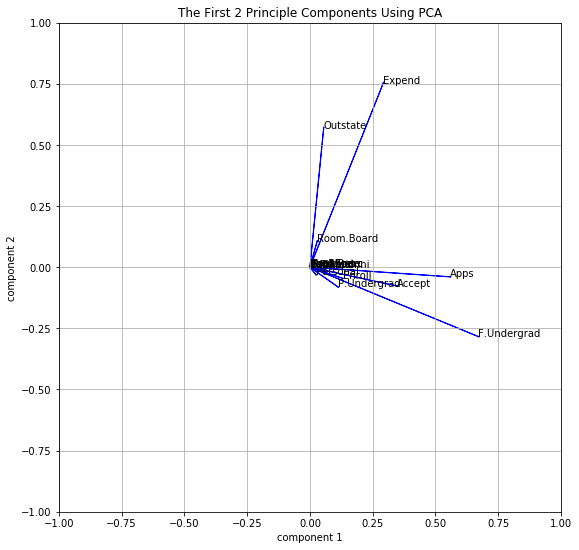

In [101]:
# plot the PCA 2 principle component result
%matplotlib inline
fig, ax = plt.subplots(figsize = (9, 9))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.grid()

for i in range(len(df.columns)):
    ax.arrow(0, 0, X_pca_2["PC - 1"][i], X_pca_2["PC - 2"][i], color = "blue")
for i in X_pca[:].index:
    ax.annotate(i, (X_pca_2["PC - 1"].loc[i], X_pca_2["PC - 2"].loc[i]))
    
ax.set_xlabel("component 1")
ax.set_ylabel("component 2")
ax.set_title("The First 2 Principle Components Using PCA")

From the tables for principle components 1 and 2 as well as the plot above, it is shown that, for principle component 1, the variables "F.Undergrad", "Apps", "and "Accept" are above 0.3 and are most correlated with this component. On the other hand, for principle component 2, the variables "Expend", "Outstate" are above 0.3 and have strong correlation with component 2. 

### 2. i) Calculate the cumulative proportion of variance explained by all the principal components ii) Approximately how much of the variance in College is explained by the first two principal components?

i ) Calculate the cumulative proportion of variance explained by all the principal components

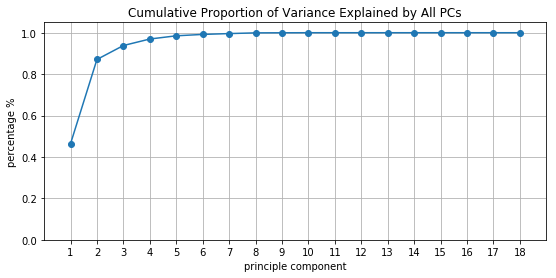

Proportion for 1 principle component(s): 0.463592174203668
Proportion for 2 principle component(s): 0.8708234752373327
Proportion for 3 principle component(s): 0.938092037034348
Proportion for 4 principle component(s): 0.9695295604756432
Proportion for 5 principle component(s): 0.9850639616128141
Proportion for 6 principle component(s): 0.9917574560009841
Proportion for 7 principle component(s): 0.9957703610411724
Proportion for 8 principle component(s): 0.9992939793852349
Proportion for 9 principle component(s): 0.9997171090395736
Proportion for 10 principle component(s): 0.9999898149564879
Proportion for 11 principle component(s): 0.9999944059171711
Proportion for 12 principle component(s): 0.9999966632779748
Proportion for 13 principle component(s): 0.9999983586484138
Proportion for 14 principle component(s): 0.9999992300398746
Proportion for 15 principle component(s): 0.9999996176376881
Proportion for 16 principle component(s): 0.9999999083068927
Proportion for 17 principle compone

In [102]:
# plot the culmulative proportion of variances by all PCs.
plt.figure(figsize = (9,4))
plt.plot(list(range(1, len(df.columns) + 1)), np.cumsum(pca_all.explained_variance_ratio_), "-o")

plt.title("Cumulative Proportion of Variance Explained by All PCs")
plt.xlabel("principle component")
plt.ylabel("percentage %")
plt.xlim(0, 19)
plt.ylim(0, 1.05)
plt.xticks(list(range(1, len(df.columns) + 1)))
plt.grid()

plt.show()

count = 0
ls_ratios = list(np.cumsum(pca_all.explained_variance_ratio_))
for i in ls_ratios:
    count += 1
    print("Proportion for {} principle component(s): {}". format(count, i))
    

ii ) Approximately how much of the variance in College is explained by the first two principal components?

In [103]:
# Calculate the procumulative explained variance by the first 2 components
value = pca_all.explained_variance_ratio_[:2].sum() * 100
print("The cumulative proportion of variance  explained by the first 2 components is {:.2f}%".format(value))

The cumulative proportion of variance  explained by the first 2 components is 87.08%


## Part II
### Problem 1: Perform PCA on the dataset and plot the observations on the first and second principal components.

In [104]:
# import data from the "USArrest" csv file
df2 = pd.read_csv("USArrests.csv", index_col = 0)

In [105]:
# standarize variables from the USArrest Dataset
X_scaled = pd.DataFrame(scale(df2), index = df2.index, columns = df2.columns)

# calculate the PCA for all and for 2 principle components, respectively
pca_arrest = PCA().fit(X_scaled)

colnames = ["PC - " + str(i) for i in range(1, len(df2.columns) + 1)]
X_arrest = pd.DataFrame(pca_arrest.components_.T, index = list(df2.columns), columns = colnames)

pca_arrest_2 = PCA(2).fit(X_scaled)
X_arrest_2 = pd.DataFrame(pca_arrest_2.fit_transform(X_scaled), index = df2.index, columns = ["PC - 1", "PC - 2"])
X_vars = pd.DataFrame(pca_arrest_2.components_.T, index = list(df2.columns), columns = ["PC - 1", "PC - 2"])

# see the pca
print("PCA on the dataset")
print(X_arrest.head())
print("")
print("PCA on 2 principle components by states")
print(X_arrest_2.head())
print("")
print("PCA on 2 principle components")
print(X_vars.head())

PCA on the dataset
            PC - 1    PC - 2    PC - 3    PC - 4
Murder    0.535899  0.418181 -0.341233  0.649228
Assault   0.583184  0.187986 -0.268148 -0.743407
UrbanPop  0.278191 -0.872806 -0.378016  0.133878
Rape      0.543432 -0.167319  0.817778  0.089024

PCA on 2 principle components by states
              PC - 1    PC - 2
State                         
Alabama     0.985566  1.133392
Alaska      1.950138  1.073213
Arizona     1.763164 -0.745957
Arkansas   -0.141420  1.119797
California  2.523980 -1.542934

PCA on 2 principle components
            PC - 1    PC - 2
Murder    0.535899  0.418181
Assault   0.583184  0.187986
UrbanPop  0.278191 -0.872806
Rape      0.543432 -0.167319


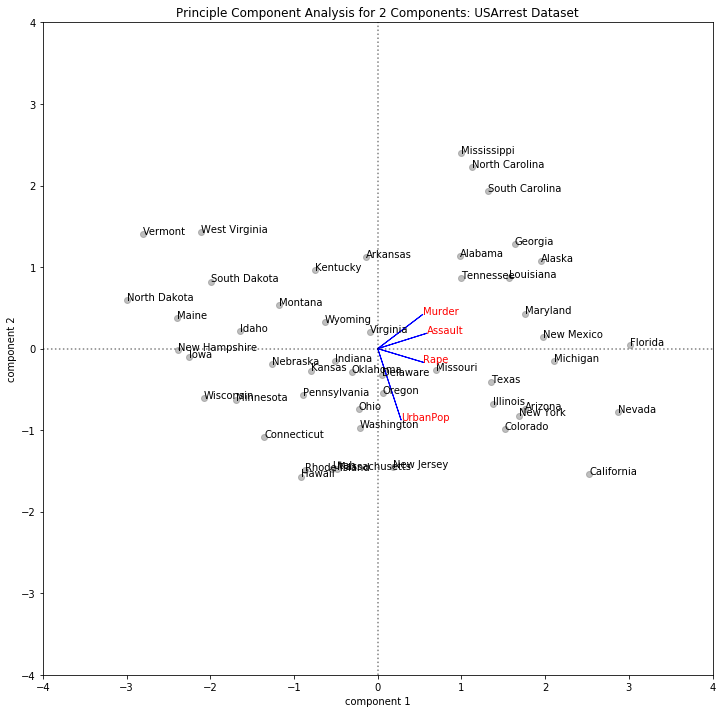

In [106]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (12, 12))
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.hlines(0, -4, 4, linestyle = "dotted", alpha = 0.5)
ax.vlines(0, -4, 4, linestyle = "dotted", alpha = 0.5)

#scatter plot for states
plt.scatter(X_arrest_2["PC - 1"], X_arrest_2["PC - 2"], color = "grey", alpha = 0.5, lw = 1)
for i in X_arrest_2[:].index:
    ax.annotate(i, (X_arrest_2["PC - 1"].loc[i], X_arrest_2["PC - 2"].loc[i]))

# arrow plot for the crimes
for i in range(len(df2.columns)):
    ax.arrow(0, 0, X_vars["PC - 1"][i], X_vars["PC - 2"][i], color = "blue")
for i in X_vars[:].index:
    ax.annotate(i, (X_vars["PC - 1"].loc[i], X_vars["PC - 2"].loc[i]), color = "red")
    
plt.title("Principle Component Analysis for 2 Components: USArrest Dataset")
plt.xlabel("component 1")
plt.ylabel("component 2")

plt.show()

### Problem 2: Perform $K$-means clustering with $K=2$. Plot the observations on the first and second principal components and color-code each state based on their cluster membership. Describe your results.

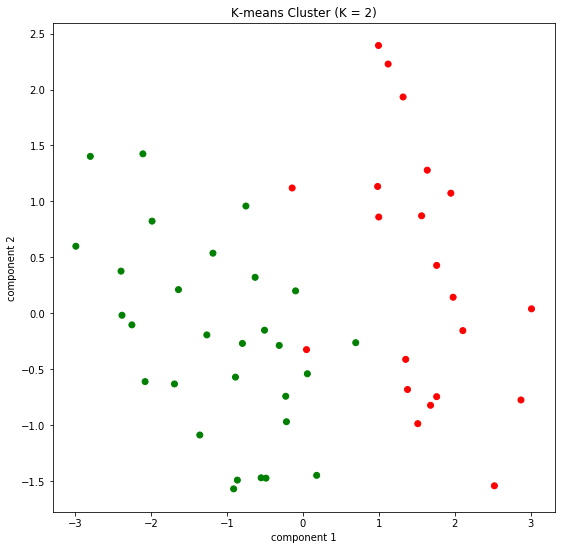

In [139]:
k_2 = KMeans(2, n_init = 20).fit(df2)

plt.figure(figsize = (9,9))
colormap = np.array(["green", "red"])
plt.scatter(X_arrest_2["PC - 1"], X_arrest_2["PC - 2"], c = colormap[k_2.labels_])

plt.title("K-means Cluster (K = 2)")
plt.xlabel("component 1")
plt.ylabel("component 2")

plt.show()

Describe results for K=2 

In [108]:
# list states for each group
labels = k_2.labels_
group = pd.Series(k_2.labels_, dtype = "category")
d = df2.copy()
d["group"] = labels
temp = pd.Series(df2.index).groupby(group)
for group, state in temp:
    print("The states from group {} are: {}".format(group + 1, list(state)))
    print("")
print("")
# table description of K = 2 groups' mean for respective crimes
print(d.groupby(d.group).mean())

The states from group 1 are: ['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Massachusetts', 'Minnesota', 'Missouri', 'Montana', 'Nebraska', 'New Hampshire', 'New Jersey', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Dakota', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

The states from group 2 are: ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Delaware', 'Florida', 'Georgia', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina', 'Tennessee', 'Texas']


          Murder     Assault   UrbanPop       Rape
group                                             
0       4.841379  109.758621  64.034483  16.248276
1      11.857143  255.000000  67.619048  28.114286


### Problem 3: Perform $K$-means clustering with $K=4$. Plot the observations on the first and second principal components and color-code each state based on their cluster membership. Describe your results.

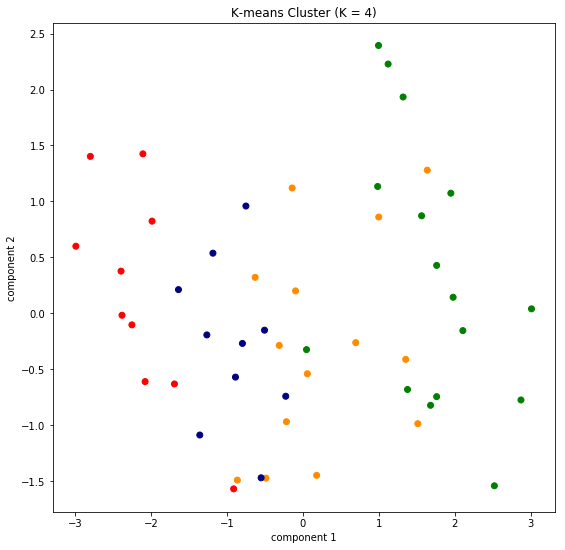

In [109]:
k_4 = KMeans(4, n_init = 20).fit(df2)

plt.figure(figsize = (9,9))
colormap = np.array(["green", "red", "DarkOrange", "navy"])
plt.scatter(X_arrest_2["PC - 1"], X_arrest_2["PC - 2"], c = colormap[k_4.labels_])

plt.title("K-means Cluster (K = 4)")
plt.xlabel("component 1")
plt.ylabel("component 2")

plt.show()

Describe the result for K = 4 

In [110]:
# list states for each group
labels = k_4.labels_
group = pd.Series(k_4.labels_, dtype = "category")
d = df2.copy()
d["group"] = labels
temp = pd.Series(df2.index).groupby(group)
for group, state in temp:
    print("The states from group {} are: {}".format(group + 1, list(state)))
    print("")
print("")
# table description of K = 4 groups' mean for respective crimes
print(d.groupby(d.group).mean())

The states from group 1 are: ['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware', 'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina']

The states from group 2 are: ['Hawaii', 'Iowa', 'Maine', 'Minnesota', 'New Hampshire', 'North Dakota', 'South Dakota', 'Vermont', 'West Virginia', 'Wisconsin']

The states from group 3 are: ['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri', 'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee', 'Texas', 'Virginia', 'Washington', 'Wyoming']

The states from group 4 are: ['Connecticut', 'Idaho', 'Indiana', 'Kansas', 'Kentucky', 'Montana', 'Nebraska', 'Ohio', 'Pennsylvania', 'Utah']


          Murder     Assault   UrbanPop       Rape
group                                             
0      11.812500  272.562500  68.312500  28.375000
1       2.950000   62.700000  53.900000  11.510000
2       8.214286  173.285714  70.642857  22.84285

### Problem 4: Perform $K$-means clustering with $K=3$. Plot the observations on the first and second principal components and color-code each state based on their cluster membership. Describe your results.


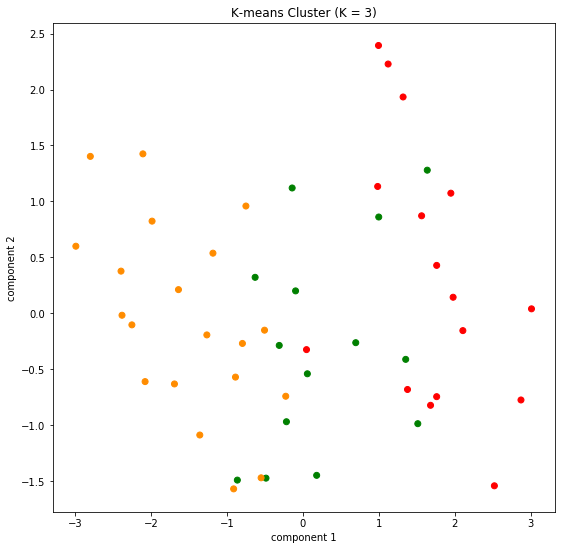

In [140]:
k_3 = KMeans(3, n_init = 20).fit(df2)

plt.figure(figsize = (9,9))
colormap = np.array(["green", "red", "DarkOrange"])
plt.scatter(X_arrest_2["PC - 1"], X_arrest_2["PC - 2"], c = colormap[k_3.labels_])
plt.title("K-means Cluster (K = 3)")
plt.xlabel("component 1")
plt.ylabel("component 2")

plt.show()

In [112]:
# list states for each group
labels = k_3.labels_
group = pd.Series(k_3.labels_, dtype = "category")
d = df2.copy()
d["group"] = labels
temp = pd.Series(df2.index).groupby(group)
for group, state in temp:
    print("The states from group {} are: {}".format(group + 1, list(state)))
    print("")
print("")
# table description of K = 3 groups' mean for respective crimes
print(d.groupby(d.group).mean())

The states from group 1 are: ['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri', 'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee', 'Texas', 'Virginia', 'Washington', 'Wyoming']

The states from group 2 are: ['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware', 'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina']

The states from group 3 are: ['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania', 'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin']


          Murder     Assault   UrbanPop       Rape
group                                             
0       8.214286  173.285714  70.642857  22.842857
1      11.812500  272.562500  68.312500  28.375000
2       4.270000   87.550000  59.750000  14.390000


### Problem 5: Perform $K$-means clustering with $K=3$ on the first two principal components score vectors, rather than the raw data. Describe your results and compare them to the clustering results with $K=3$ based on the raw data.

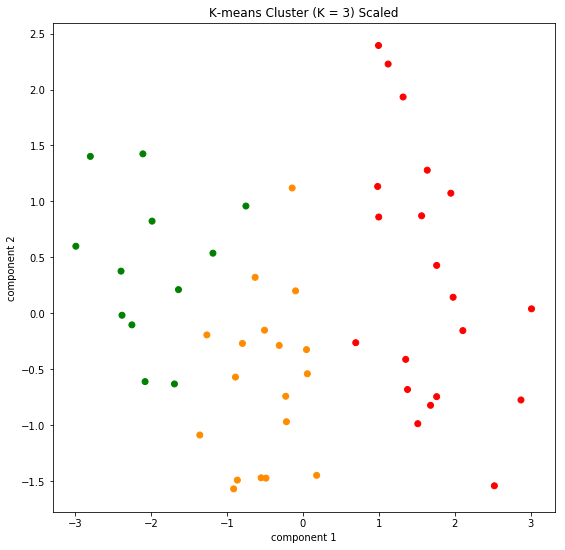

In [145]:
k_3_scaled = KMeans(3, n_init = 20).fit(X_arrest_2)

plt.figure(figsize = (9,9))
colormap = np.array(["green", "red", "DarkOrange", "navy"])
plt.scatter(X_arrest_2["PC - 1"], X_arrest_2["PC - 2"], c = colormap[k_3_scaled.labels_])
plt.title("K-means Cluster (K = 3) Scaled")
plt.xlabel("component 1")
plt.ylabel("component 2")

plt.show()

Describe the result

In [148]:
# list states for each group
labels = k_3_scaled.labels_
group = pd.Series(k_3_scaled.labels_, dtype = "category")
d = df2.copy()
d["group"] = labels
temp = pd.Series(df2.index).groupby(group)
for group, state in temp:
    print("The states from group {} are: {}".format(group + 1, list(state)))
    print("")
# table description of K = 3 groups' mean for respective crimes
print(d.groupby(d.group).mean())

The states from group 1 are: ['Idaho', 'Iowa', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'New Hampshire', 'North Dakota', 'South Dakota', 'Vermont', 'West Virginia', 'Wisconsin']

The states from group 2 are: ['Alabama', 'Alaska', 'Arizona', 'California', 'Colorado', 'Florida', 'Georgia', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Missouri', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina', 'Tennessee', 'Texas']

The states from group 3 are: ['Arkansas', 'Connecticut', 'Delaware', 'Hawaii', 'Indiana', 'Kansas', 'Massachusetts', 'Nebraska', 'New Jersey', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'Utah', 'Virginia', 'Washington', 'Wyoming']

          Murder     Assault   UrbanPop       Rape
group                                             
0       3.541667   76.583333  51.250000  11.816667
1      12.165000  255.250000  68.400000  29.165000
2       5.755556  139.666667  71.888889  18.694444


Compare to the K-means(k = 3) plot for all data, the K-means(k = 3) plot using the 2 principle component vectors has a clearer and more discrete boundary. One can see from the plot for all data, the groups' scatter points are sometimes in each other's cluster, which does not happen with the plot using the 2 principle component vectors.

One can see from the table above that has the description of the respective mean for different crimes for respective groups using 2 principle components. The value has changed slightly due to possible increase of accuracy.

It is possible that this result is due to the principle component vectors being the results from the fitted PCA values and also they are scaled.

### Problem 6: Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

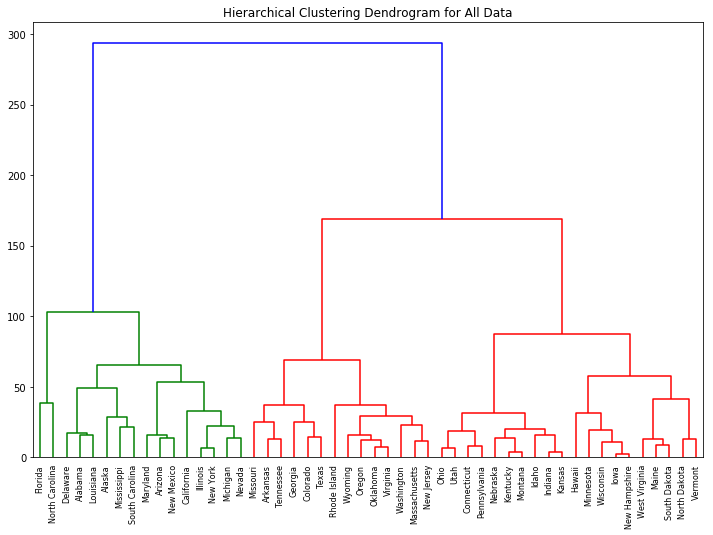

In [149]:
hier = cluster_hierarchy.complete(df2)

plt.figure(figsize = (12, 8))
cluster_hierarchy.set_link_color_palette(["green", "red", "DarkOrange"])
cluster_hierarchy.dendrogram(hier,  labels = df2.index)

plt.title("Hierarchical Clustering Dendrogram for All Data")

plt.show()

### Problem 7: Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?

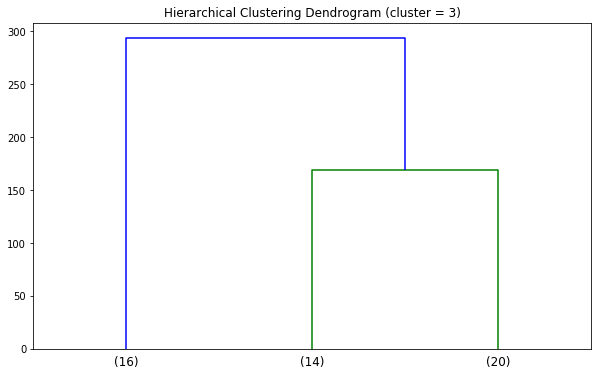

In [61]:
plt.figure(figsize = (10, 6))
cluster_hierarchy.dendrogram(hier, truncate_mode = "lastp", p = 3, labels = df2.index)

plt.title("Hierarchical Clustering Dendrogram (cluster = 3)")

plt.show()

Comparing the two plots, one can see:

*groups* | *States*
--------|-------------
group 1 | Florida, North Carolina, Delaware, Alabama, Louisiana, Alaska, Mississippi, South Carolina, Maryland, Arizona, New Mexico, California, Illinois, New York, Michigan, Nevada
group 2 | Missouri, Arkansas, Tennessee, Georgia, Colorado, Texas, Rhode Island, Wyoming, Oregon, Oklahoma, Virginia, Washington, Massachusetts, New Jersey
group 3 | Ohio, Utah, Connecticut, Pennsylvania, Nebraska, Kentucky, Montana, Idoha, Indiana, Kansas, Hawaii, Minnesota, Wisconsin, Iowa, New Hampshire, West Virginia, Maine, South Dakota, North Dakota, Vermount

### Problem 8: Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation $1$. What effect does scaling the variables have on the hierarchical clustering obtained?

In [62]:
print(df2.head())
print("")
print(X_scaled.head())

            Murder  Assault  UrbanPop  Rape
State                                      
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6

              Murder   Assault  UrbanPop      Rape
State                                             
Alabama     1.255179  0.790787 -0.526195 -0.003451
Alaska      0.513019  1.118060 -1.224067  2.509424
Arizona     0.072361  1.493817  1.009122  1.053466
Arkansas    0.234708  0.233212 -1.084492 -0.186794
California  0.281093  1.275635  1.776781  2.088814


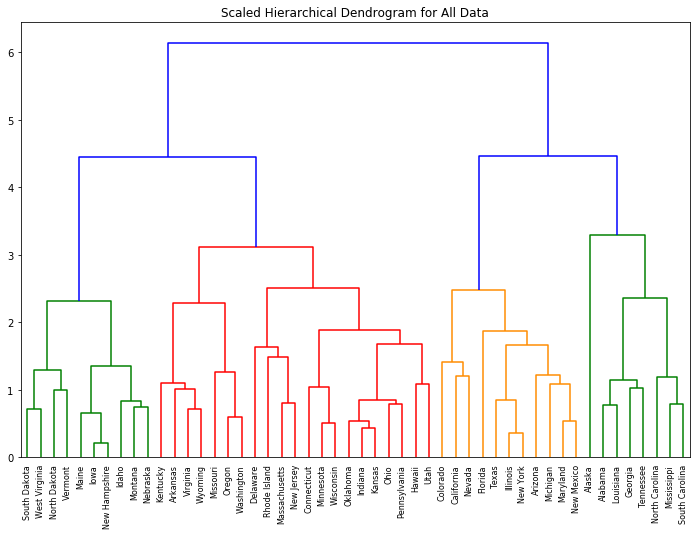

In [64]:
hier_scaled = cluster_hierarchy.complete(X_scaled)

plt.figure(figsize = (12, 8))
cluster_hierarchy.dendrogram(hier_scaled, labels = X_scaled.index)

plt.title("Scaled Hierarchical Dendrogram for All Data")

plt.show()

Compare this hierachical denrogram for scaled variables to the previous raw data, one can see that scaling has effected the way this tree cluster and creates its internal nodes. 

Scaling the variables allow one to compare variables that previously have different units and become comparable within the dataset provided. The effect of the scaling variables on the hierarchical cluster obtained is that it gives a more accurate representation of the relation of these variables and states within the given sample space. 